Trazar un gráfico en Python, instalar una biblioteca externa llamada matplotlib. pip install matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

letters = {
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0
}

colours = [ # different shades of green
    '#04ff00',
    '#03e000',
    '#03bf00',
    '#02a300',
    '#028700',
    '#016b00',
    '#015100',
    '#003800',
    '#002100'
]

nfib = 500

Generarar los numeros de fibonacci

In [2]:
def GenerarFibonacci(n):
    a, b = 0, 1

    l = []

    for i in range(n):
        a, b = b, a + b

        l.append(a)

    return l

Extraer los digitos significativos

In [3]:
list_of_nums = GenerarFibonacci(nfib)

for n in list_of_nums:
    first_digit = str(n)[0]
    letters[first_digit] += 1

Frecuencias observadas

In [4]:
letters

{'1': 151,
 '2': 88,
 '3': 63,
 '4': 47,
 '5': 40,
 '6': 33,
 '7': 29,
 '8': 27,
 '9': 22}

Coordenadas

In [5]:
x = list(letters.keys())
y = [round(val / nfib, 4) for val in letters.values()]
fre_relativa = y


libreria de Matplotlib, configurar titulo, setea lo que va abajo y a un lado

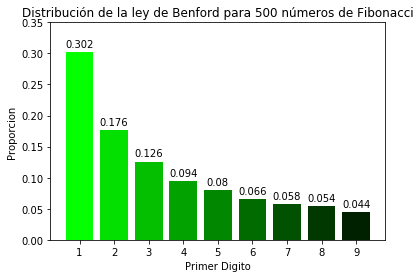

In [6]:
plt.title("Distribución de la ley de Benford para "+str(nfib)+" números de Fibonacci")
plt.xlabel('Primer Digito')
plt.ylabel('Proporcion')

plt.ylim([0, 0.35])
bars = plt.bar(x, y, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

Plano donde se va graficar

In [7]:
x = list(letters.keys())
y = list(letters.values())
f0= y

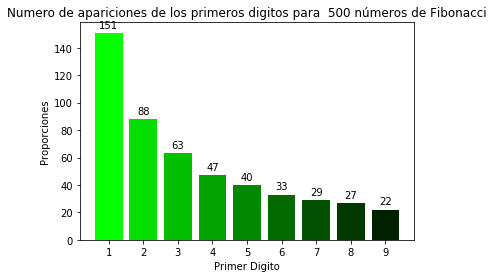

In [8]:
plt.title("Numero de apariciones de los primeros digitos para  "+str(nfib)+" números de Fibonacci")
plt.xlabel('Primer Digito')
plt.ylabel('Proporciones')
bars = plt.bar(x, y, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

In [9]:
x = list(letters.keys())
y =  [round(math.log10(1+(1/int(val))), 4) for val in letters.keys()]
benford = y

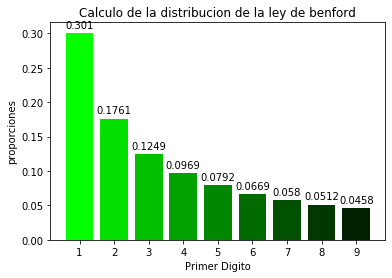

In [10]:
plt.title("Calculo de la distribucion de la ley de benford")
plt.xlabel('Primer Digito')
plt.ylabel('proporciones')

bars = plt.bar(x, y, color=colours)

for bar in bars:
    height = bar.get_height()

    plt.annotate(f'{height}',
        xy = (bar.get_x() + bar.get_width() / 2, height),
        xytext = (0, 3),
        textcoords = 'offset points',
        ha = 'center',
        va = 'bottom'
    )

 Grafica de la Ley Benford frente a datos analizados

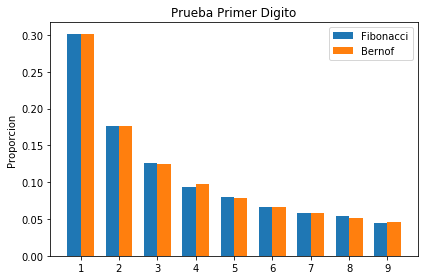

In [11]:
x = np.arange(9)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [round(val / nfib, 4) for val in letters.values()], width, label='Fibonacci')
rects2 = ax.bar(x + width/2, y, width, label='Bernof')

ax.set_ylabel('Proporcion')
ax.set_title('Prueba Primer Digito')
ax.set_xticks(x)
ax.set_xticklabels(list(letters.keys()))
ax.legend()



fig.tight_layout()

plt.show()


Frecuencia esperada

In [12]:
f0 = np.array(f0)
f0

array([151,  88,  63,  47,  40,  33,  29,  27,  22])

Frecuencia relativa

In [13]:
fre_relativa = np.array(fre_relativa)
fre_relativa 

array([0.302, 0.176, 0.126, 0.094, 0.08 , 0.066, 0.058, 0.054, 0.044])

Probabilidad Ley Benford

In [14]:
benford = np.array(benford)
benford

array([0.301 , 0.1761, 0.1249, 0.0969, 0.0792, 0.0669, 0.058 , 0.0512,
       0.0458])

Total de elementos analisados

In [15]:
f0_tot=f0.sum()
f0_tot

500

Frecuencia esperada

In [16]:
fe = benford*f0_tot

In [17]:
fe 

array([150.5 ,  88.05,  62.45,  48.45,  39.6 ,  33.45,  29.  ,  25.6 ,
        22.9 ])

suma total de la frecuencia esperada

In [18]:
fe.sum()

500.0

Diferencia entre la proporcion dee Benford y la recuencia ralativa

In [19]:
diferencia = abs(fre_relativa - benford)
diferencia 

array([0.001 , 0.0001, 0.0011, 0.0029, 0.0008, 0.0009, 0.    , 0.0028,
       0.0018])

Suma total de las diferencias

In [20]:
diferencia.sum()

0.011400000000000014

Calculando el estadistico de prueba (chi cuadrado) $x^2$

In [21]:
f0_fe= (f0-fe)

In [22]:
f0_fe_2 = f0_fe*f0_fe

In [23]:
f0_fe_2_fe=f0_fe_2/fe
f0_fe_2_fe

array([1.66112957e-03, 2.83929585e-05, 4.84387510e-03, 4.33952528e-02,
       4.04040404e-03, 6.05381166e-03, 0.00000000e+00, 7.65625000e-02,
       3.53711790e-02])

Estadistico de prueba $x^2$

In [24]:
x_2 = f0_fe_2_fe.sum()
x_2 

0.17195654520360815

Diferencia Media Absoluta

In [25]:
MAD = diferencia.sum()/9
MAD

0.0012666666666666683